# Dataset Penjualan SaaS AWS

---


## Latar Belakang Perusahaan

AWS (Amazon Web Services) didirikan pada tahun 2006. AWS menawarkan berbagai produk dan layanan yang mencakup berbagai bidang.

Fokus utama kita adalah pada model SaaS AWS. Software as a Service (SaaS) adalah model perangkat lunak berbasis cloud yang menyajikan aplikasi kepada pelanggan melalui internet. Dalam model ini, penyedia SaaS mengelola dan mengoperasikan aplikasi yang bisa diakses pelanggan sesuai kebutuhan. Pelanggan tidak perlu mengelola infrastruktur atau layanan pendukung, mereka hanya fokus pada penggunaan software.

SaaS umumnya menggunakan model harga berlangganan atau bayar sesuai pemakaian, bukan pembelian putus. Salah satu contoh aplikasi SaaS dari AWS adalah Amazon WorkDocs—layanan penyuntingan dokumen yang memungkinkan pelanggan menyimpan, berbagi, dan berkolaborasi secara aman di cloud.

# Persiapan Data

## Dataset

In [131]:
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy.stats import shapiro,spearmanr
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

In [132]:
df = pd.read_csv('SaaS-Sales.csv')
display(df.head())
len(df)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


9994

Dataset ini berisi informasi transaksi dari sebuah perusahaan SaaS (Software as a Service) fiktif yang berfokus pada perangkat lunak penjualan dan pemasaran untuk interaksi bisnis-ke-bisnis (B2B). Setiap baris dalam dataset mewakili satu produk dalam suatu transaksi, dengan kolom-kolom yang mencakup berbagai detail seperti yang dijelaskan pada tabel di bawah ini:

| No.  | Nama Kolom       | Deskripsi                                                |
|------|------------------|-----------------------------------------------------------|
| 1    | Row ID           | ID unik untuk setiap transaksi.                          |
| 2    | Order ID         | ID unik untuk setiap pesanan.                            |
| 3    | Order Date       | Tanggal pemesanan dilakukan.                             |
| 4    | Date Key         | Representasi numerik dari tanggal pemesanan (MMDDYYYY).  |
| 5    | Contact Name     | Nama orang yang melakukan pemesanan.                     |
| 6    | Country          | Negara tempat pesanan dilakukan.                         |
| 7    | City             | Kota tempat pesanan dilakukan.                           |
| 8    | Region           | Wilayah tempat pesanan dilakukan.                        |
| 9    | Subregion        | Subwilayah tempat pesanan dilakukan.                     |
| 10   | Customer         | Nama perusahaan yang melakukan pemesanan.                |
| 11   | Customer ID      | ID unik untuk setiap pelanggan.                          |
| 12   | Industry         | Industri tempat pelanggan berada.                        |
| 13   | Segment          | Segmen pelanggan (misalnya: SMB, Strategic, Enterprise). |
| 14   | Product          | Produk yang dipesan.                                     |
| 15   | License          | Kunci lisensi untuk produk.                              |
| 16   | Sales            | Total nilai penjualan untuk transaksi tersebut.          |
| 17   | Quantity         | Jumlah unit produk dalam transaksi.                      |
| 18   | Discount         | Diskon yang diberikan pada transaksi.                    |
| 19   | Profit           | Keuntungan yang diperoleh dari transaksi tersebut.       |

## Pengecekan & Pembersihan Data

### Pengecekan Data

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [134]:
df.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


In [135]:
df.isnull().any()

Row ID          False
Order ID        False
Order Date      False
Date Key        False
Contact Name    False
Country         False
City            False
Region          False
Subregion       False
Customer        False
Customer ID     False
Industry        False
Segment         False
Product         False
License         False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

In [136]:
df.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Date Key        0
Contact Name    0
Country         0
City            0
Region          0
Subregion       0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [137]:
df['City'].unique()

array(['Dublin', 'New York City', 'Stuttgart', 'Stockholm', 'Toronto',
       'Saitama', 'Naples', 'Ankara', 'Los Angeles', 'San José', 'Paris',
       'Istanbul', 'Tokyo', 'Aichi', 'Wollongong', 'Hanover',
       'Luxembourg', 'Salvador', 'Davao City', 'Kolkata', 'London',
       'Brighton', 'Sydney', 'Puente Alto', 'Madrid', 'Rio de Janeiro',
       'Cape Town', 'Lisboa', 'Uppsala', 'Bogotá', 'Brussels', 'Moscow',
       'Canberra', 'The Hague', 'Mexico City', 'Manila', 'Geelong',
       'Santiago', 'Aurora', 'Warsaw', 'Newark', 'Monterrey', 'Rome',
       'Chicago', 'Singapore', 'Wellington', 'Osaka', 'Melbourne',
       'Prague', 'Riyadh', 'Raleigh', 'Providence', 'Córdoba',
       'Guadalajara', 'Oklahoma City', 'Puerto Vallarta', 'São Paulo',
       'Johannesburg', 'Cologne', 'Rochester', 'Seattle', 'Detroit',
       'Lafayette', 'Munich', 'St Petersburg', 'Buenos Aires', 'Mendoza',
       'Leipzig', 'Jacksonville', 'Long Beach', 'Chiba', 'Incheon',
       'Helsinki', 'Dhahran', 

In [138]:
df['Country'].unique()

array(['Ireland', 'United States', 'Germany', 'Sweden', 'Canada', 'Japan',
       'Italy', 'Turkey', 'Costa Rica', 'France', 'Australia',
       'Luxembourg', 'Brazil', 'Philippines', 'India', 'United Kingdom',
       'Chile', 'Spain', 'South Africa', 'Portugal', 'Colombia',
       'Belgium', 'Russia', 'Netherlands', 'Mexico', 'Poland',
       'Singapore', 'New Zealand', 'Czech Republic', 'Saudi Arabia',
       'Argentina', 'South Korea', 'Finland', 'Israel', 'Norway',
       'Ukraine', 'United Arab Emirates', 'Greece', 'China', 'Austria',
       'Indonesia', 'Egypt', 'Denmark', 'Croatia', 'Taiwan', 'Qatar',
       'Slovenia', 'Iceland'], dtype=object)

In [139]:
df['Region'].unique()

array(['EMEA', 'AMER', 'APJ'], dtype=object)

In [140]:
df['Profit'].unique()

array([ 41.9136, 219.582 ,   6.8714, ...,  16.124 ,   4.1028,  72.948 ],
      shape=(7287,))

> Setelah melakukan cek Dataset yang ada, tidak ditemukan nya missing values and duplicates.

### Pemeriksaan Outlier

---
**Tujuan:** Mengidentifikasi dan mengelompokkan outlier pada berbagai kolom numerik terkait data penjualan.

In [141]:
num_cols = ['Discount', 'Profit', 'Quantity', 'Sales']

>*Pemilihan Data:*
  - Kolom numerik yang dianalisis meliputi: `Discount`, `Profit`, `Quantity`, dan `Sales`.
  - Kolom `Product` digunakan untuk keperluan pengelompokan.

In [142]:
num_data = df[num_cols]
Q1 = num_data[['Discount', 'Profit', 'Quantity', 'Sales']].quantile(0.25)
Q3 = num_data[['Discount', 'Profit', 'Quantity', 'Sales']].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


>*Identifikasi Outlier:*
  - Menghitung kuartil pertama (Q1), kuartil ketiga (Q3), dan rentang antar-kuartil (IQR) untuk setiap kolom numerik.
  - Menentukan batas atas dan bawah menggunakan aturan 1.5*IQR.
  - Membuat masker boolean untuk menandai outlier positif dan negatif.

In [143]:
outliers_positive_mask = (df[['Discount', 'Profit', 'Quantity', 'Sales']] > upper_bound).any(axis=1)
outliers_negative_mask = (df[['Discount', 'Profit', 'Quantity', 'Sales']] < lower_bound).any(axis=1)


>*Kategorisasi Outlier:*
  - Menambahkan kolom baru bernama `Outlier_Type` dengan nilai awal `No Outlier`.
  - Menetapkan `Outlier_Type` berdasarkan hasil identifikasi:
    - `Positive Outlier` jika nilai melebihi batas atas.
    - `Negative Outlier` jika nilai di bawah batas bawah.

In [144]:
df['Outlier_Type'] = 'No Outlier'
df.loc[outliers_positive_mask, 'Outlier_Type'] = 'Positive Outlier'
df.loc[outliers_negative_mask, 'Outlier_Type'] = 'Negative Outlier'


>*Persentase Outlier per Produk:*
  - Data dikelompokkan berdasarkan `Product` dan `Outlier_Type` untuk menghitung frekuensi masing-masing tipe.
  - Menghitung persentase outlier untuk setiap produk.
  - Hasil ditampilkan dalam format tabel dengan kolom `Negative Outlier`, `No Outlier`, dan `Positive Outlier`.

In [145]:
outlier_percentage_by_product = df.groupby(['Product', 'Outlier_Type']).size().unstack(fill_value=0)
outlier_percentage_by_product = outlier_percentage_by_product.div(outlier_percentage_by_product.sum(axis=1), axis=0) * 100

In [146]:
outlier_percentage_by_product

Outlier_Type,Negative Outlier,No Outlier,Positive Outlier
Product,,,
Alchemy,0.000000,4.411765,95.588235
Big Ol Database,29.565217,15.652174,54.782609
ChatBot Plugin,0.000000,97.864322,2.135678
ContactMatcher,13.192182,47.557003,39.250814
Data Smasher,0.387097,77.548387,22.064516
FinanceHub,7.441386,68.195719,24.362895
Marketing Suite,25.877193,49.561404,24.561404
Marketing Suite - Gold,6.146572,74.704492,19.148936
OneView,9.012876,63.519313,27.467811


- **Interpretasi Hasil:**

  - Untuk setiap produk, tabel menunjukkan distribusi persentase dari outlier negatif, tidak ada outlier, dan outlier positif pada kolom numerik terpilih.
  - Produk seperti `'ChatBot Plugin'` dan `'Storage'` memiliki persentase `No Outlier` yang tinggi, menandakan performa yang relatif stabil.
  - `'Alchemy'` menunjukkan banyak `Positive Outlier`, mengindikasikan potensi penjualan tinggi dalam beberapa kasus. Produk dengan outlier positif tinggi bisa menjadi kandidat untuk cross-selling atau promosi agresif.
  - `'Big Ol Database'` memiliki persentase outlier negatif tertinggi (~29.57%), yang bisa menunjukkan performa buruk atau ketidakstabilan penjualan produk tersebut. Produk dengan outlier negatif perlu dianalisis lebih lanjut — apakah karena harga terlalu tinggi, margin kecil, atau faktor lokasi / segmentasi ?

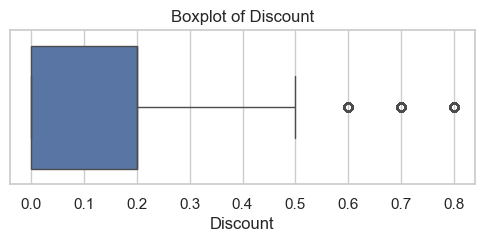

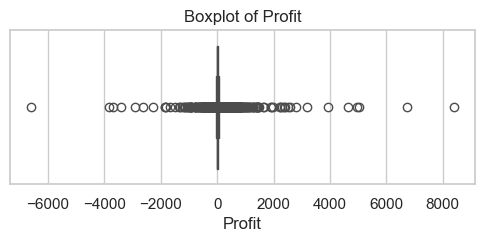

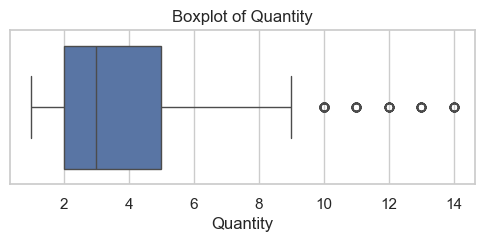

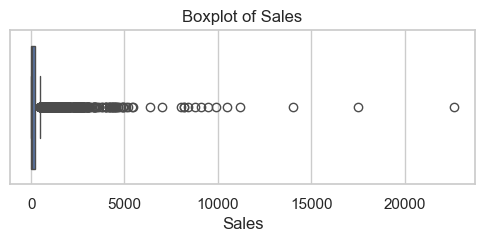

In [147]:
for col in ['Discount', 'Profit', 'Quantity', 'Sales']:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

### Pemeriksaan Distribusi Data

---
**Tujuan:** Memahami sebaran penjualan antar produk serta mendeteksi pola tak wajar yang mungkin muncul. Informasi ini penting untuk membantu tim pengembangan produk dalam perencanaan, manajemen stok, serta strategi pemasaran agar produk lebih sesuai dengan kebutuhan pasar.

In [148]:
columns_of_interest = ['Sales', 'Quantity', 'Discount', 'Profit']

In [149]:
alpha = 0.05


Shapiro-Wilk Test for Normality (Sales):
  p-value: 4.065053524283138e-105
  The distribution of Sales is likely not normal.


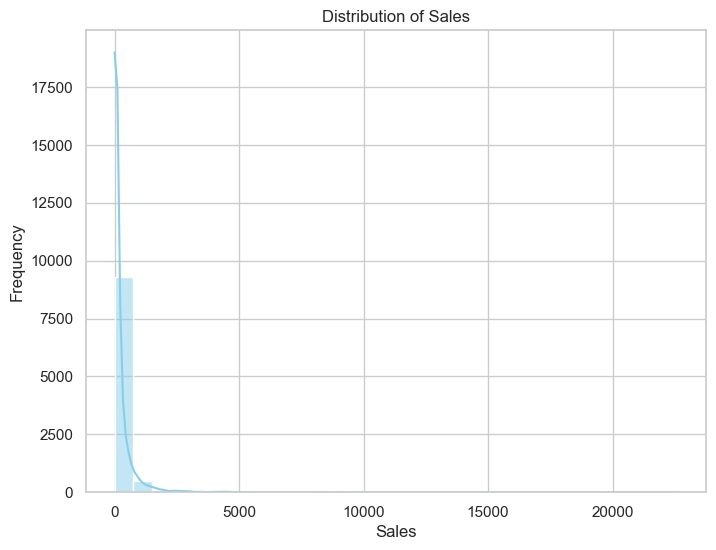


Shapiro-Wilk Test for Normality (Quantity):
  p-value: 1.5185663017552264e-65
  The distribution of Quantity is likely not normal.


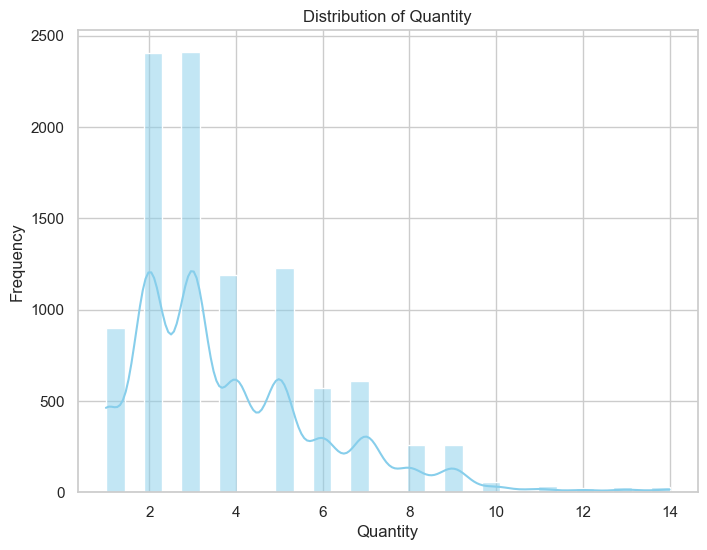


Shapiro-Wilk Test for Normality (Discount):
  p-value: 1.030847481822623e-84
  The distribution of Discount is likely not normal.


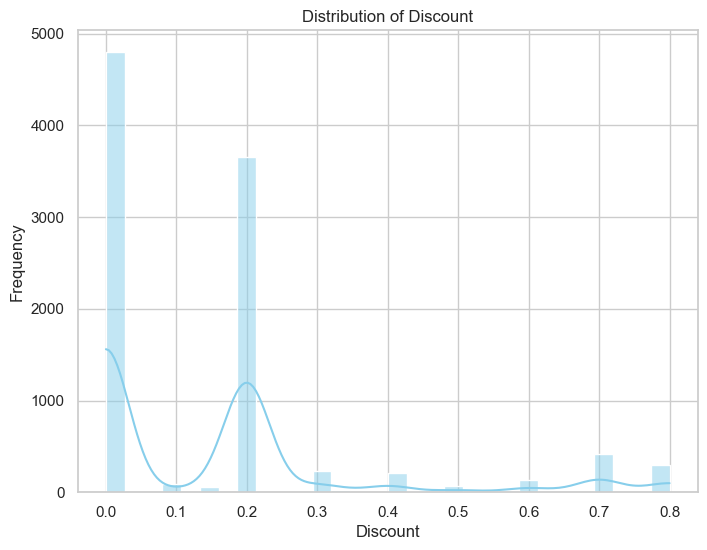


Shapiro-Wilk Test for Normality (Profit):
  p-value: 1.6987856431860357e-107
  The distribution of Profit is likely not normal.


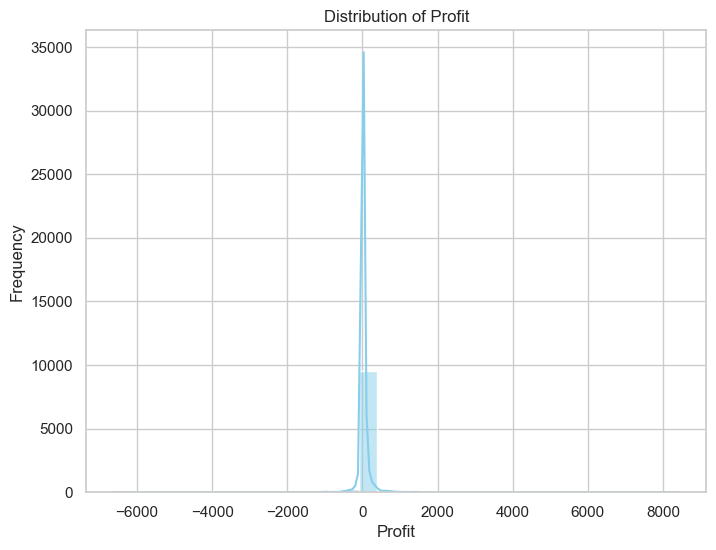

In [150]:
for column_of_interest in columns_of_interest:
    # Extract the column for analysis
    data = df[column_of_interest]

    # Shapiro-Wilk test for normality
    stat, p_value = shapiro(data)

    # Print the result of the Shapiro-Wilk test
    print(f"\nShapiro-Wilk Test for Normality ({column_of_interest}):")
    print(f"  p-value: {p_value}")

    # Check if the p-value is less than the significance level
    if p_value > alpha:
        print(f"  The distribution of {column_of_interest} is likely normal.")
    else:
        print(f"  The distribution of {column_of_interest} is likely not normal.")

    # Visualize the distribution with a histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(data, kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {column_of_interest}')
    plt.xlabel(column_of_interest)
    plt.ylabel('Frequency')
    plt.show()

All of the data is not normally distributed.

### Konversi String Menjadi Format Datetime

In [151]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

> *Konversi Tipe Data:*
  - Kolom `Order Date` dikonversi dari format teks (string) ke format tanggal (`datetime`) menggunakan `pd.to_datetime`.

# **Analisis Efektivitas Penjualan**

## **1. Analisis Performa Penjualan Produk**

---

**Tujuan:**

Menganalisis kinerja masing-masing produk dan memberikan wawasan berdasarkan nilai penjualan median, selaras dengan kebutuhan tim pengembangan produk.

In [152]:
ps_median = df.groupby(['Product'])['Sales'].median().reset_index()

In [153]:
sales_summary = ps_median.sort_values(by='Sales', ascending=False).reset_index(drop=True)

>*Pemrosesan Data:*
  - Data dikelompokkan berdasarkan `Product`, lalu dihitung nilai median penjualannya.
  - Produk diurutkan berdasarkan rata-rata penjualan dari yang tertinggi ke terendah.

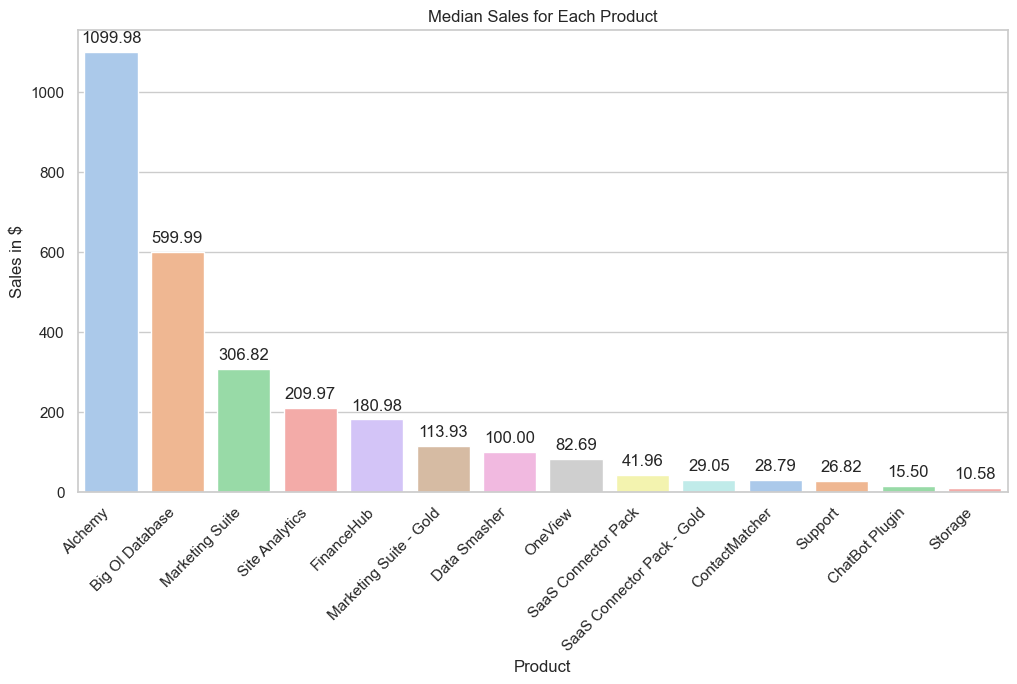

In [154]:
colors = sns.color_palette("pastel")

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Product', y='Sales', data=sales_summary, palette=colors)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Median Sales for Each Product')
plt.xlabel('Product')
plt.ylabel('Sales in $')
plt.xticks(rotation=45, ha='right')
plt.show()

>*Visualisasi:*
  - Menggunakan diagram batang (bar chart) untuk menampilkan produk dan nilai rata-rata penjualannya.

- **Interpretasi Output:**

  1. Produk-produk unggulan seperti `Alchemy`, `Big Ol Database`, dan `Marketing Suite` menunjukkan keberhasilan di pasar dengan angka penjualan yang kuat.
  
  2. Produk seperti `Saas Connector Pack - Gold`, `ChatBot Plugin`, dan `Storage` memiliki rata-rata penjualan lebih rendah, yang bisa menjadi sinyal perlunya perbaikan atau strategi baru.

## **2. Analisis Pola Penjualan dari Waktu ke Waktu**

---

**Tujuan:**

Mengamati tren penjualan dari waktu ke waktu, sebagai dasar pengambilan keputusan tim pengembangan produk.

In [155]:
df['Order Date']

0      2022-11-09
1      2022-11-09
2      2022-06-13
3      2021-10-11
4      2021-10-11
          ...    
9989   2020-01-22
9990   2023-02-27
9991   2023-02-27
9992   2023-02-27
9993   2023-05-05
Name: Order Date, Length: 9994, dtype: datetime64[ns]

In [156]:
df['Year'] = df['Order Date'].dt.strftime('%Y').astype(str)
df['Year-Month'] = df['Order Date'].dt.to_period('M')
df['Year-Month'] = df['Year-Month'].astype(str)


> *Persiapan Data:*
  - Mengambil bulan dan tahun dari kolom `Order Date`, lalu membuat kolom baru untuk analisis.

In [157]:
monthly_sales = df.groupby('Year-Month')['Sales'].sum().reset_index()

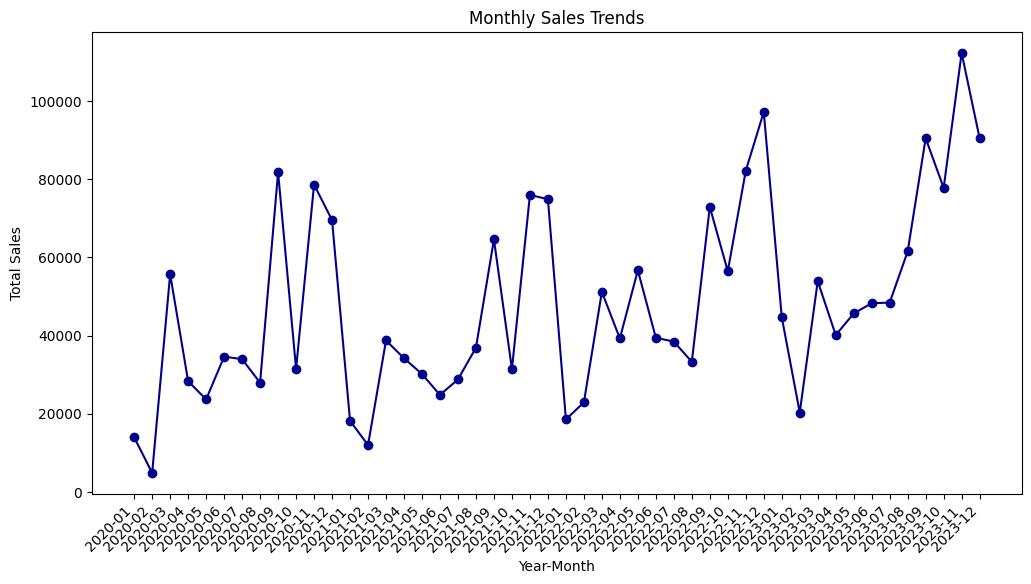

In [158]:
plt.figure(figsize=(12, 6))
plt.style.use('default')
plt.plot(monthly_sales['Year-Month'], monthly_sales['Sales'],  marker='o', color='darkblue')

plt.title('Monthly Sales Trends')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')

plt.show()

> *Tren Penjualan Bulanan:*
  - Data dikelompokkan per bulan dan dihitung total penjualannya.

In [159]:
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()

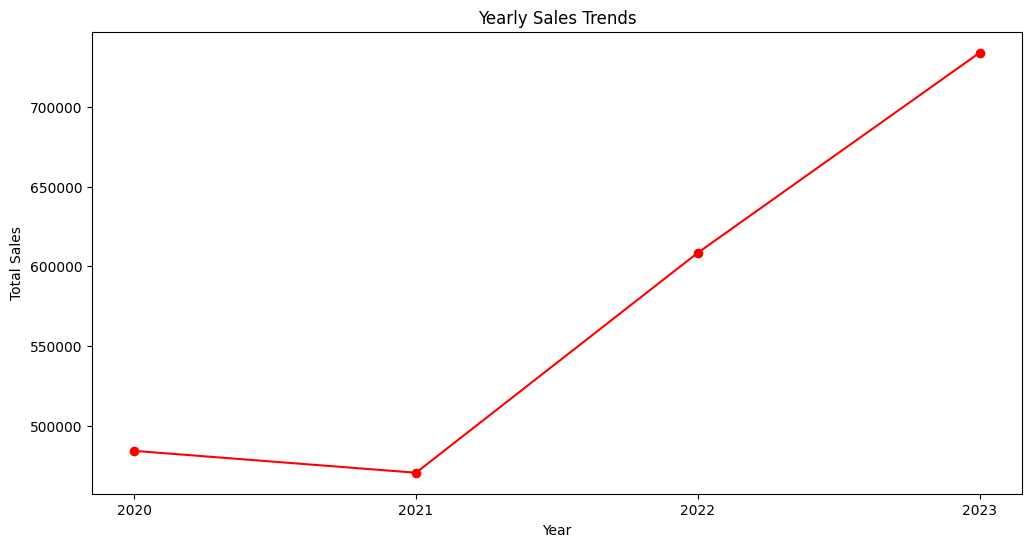

In [160]:
custom_palette = sns.color_palette("husl", 4)
plt.figure(figsize=(12, 6))
line_chart = plt.plot(yearly_sales['Year'], yearly_sales['Sales'], marker='o', color='red')

# # Adding annotations for each point
# for i, (x, y) in enumerate(zip(yearly_sales['Year'], yearly_sales['Sales'])):
#     plt.text(x, y, round(y, 2), ha='center', va='bottom',
#              bbox=dict(boxstyle='round,pad=0.3', edgecolor='red', facecolor='white'))

plt.title('Yearly Sales Trends')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

> *Tren Penjualan Tahunan:*
  - Data dikelompokkan per tahun dan dihitung total penjualannya.

- **Interpretasi Output:**
    - **Tren Penjualan Bulanan:**
    Data bulanan dari Januari 2020 hingga Desember 2023 menunjukkan fluktuasi. Terdapat lonjakan signifikan di beberapa bulan, penurunan di bulan lain, dan pola penjualan yang cenderung lebih tinggi menjelang akhir tahun.

    - **Tren Penjualan Tahunan:**
    Terdapat pertumbuhan konsisten dari tahun 2020 hingga 2023, dengan puncak tertinggi terjadi pada tahun 2023.

## **3. Wawasan Performa Produk Berdasarkan Pelanggan**

---

**Tujuan:**

Memberikan data yang bernilai bagi tim pengembangan produk tentang preferensi pelanggan dan perilaku pembelian yang sering dilakukan.

In [161]:
def custom_mode(series):
    return series.mode()[0] if not series.mode().empty else None


> *Fungsi Mode Kustom:*
  - Membuat fungsi untuk menghitung nilai `mode` dari data kategorikal (`Country`, `Segment`, `Industry`) untuk setiap pelanggan.

In [162]:
customer_info = df.groupby('Customer ID').agg({
    'Sales': 'sum',
    'Country': custom_mode,
    'Segment': custom_mode,
    'Industry': custom_mode
}).reset_index()
customer_info

,Customer ID,Sales,Country,Segment,Industry
0,1001,12617.1140,United States,Strategic,Healthcare
1,1002,27278.5930,United States,SMB,Healthcare
2,1003,39941.6400,United States,SMB,Finance
3,1004,23189.2165,United States,SMB,Tech
4,1005,33514.9210,United States,Strategic,Finance
...,...,...,...,...,...
94,1097,29483.0050,Japan,Strategic,Communications
95,1098,22650.8206,United Kingdom,SMB,Transportation
96,1099,23180.5442,United Kingdom,SMB,Finance
97,1100,33447.1270,United Kingdom,SMB,Finance


> *Agregasi Informasi Pelanggan:*
  - Data dikelompokkan berdasarkan `Customer ID`, lalu dikumpulkan informasi total penjualan dan nilai dominan dari atribut kategorikal.

In [163]:
loyalty = customer_info.sort_values(by='Sales', ascending=False)

In [164]:
top3_customers = loyalty.nlargest(3, 'Sales')


> *Identifikasi 3 Pelanggan Paling Loyal:*
  - Pelanggan diurutkan berdasarkan total penjualan, lalu diambil 3 teratas sebagai pelanggan paling loyal.

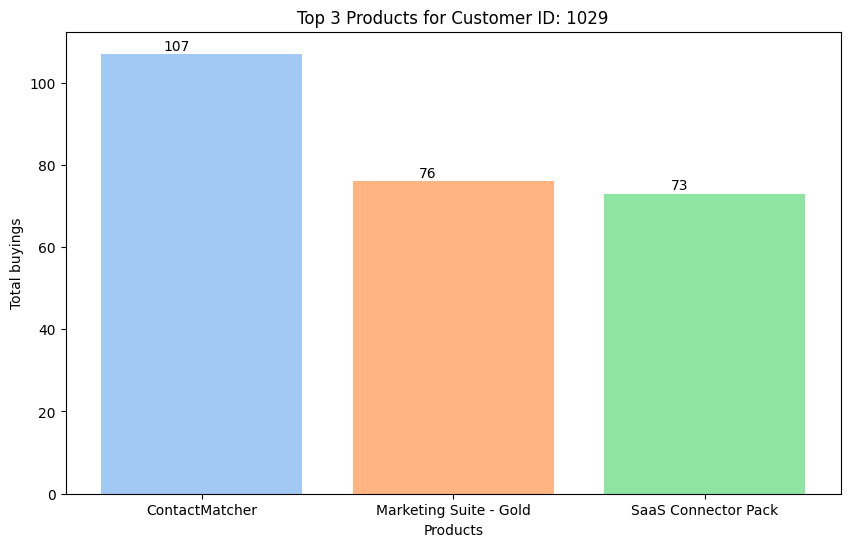

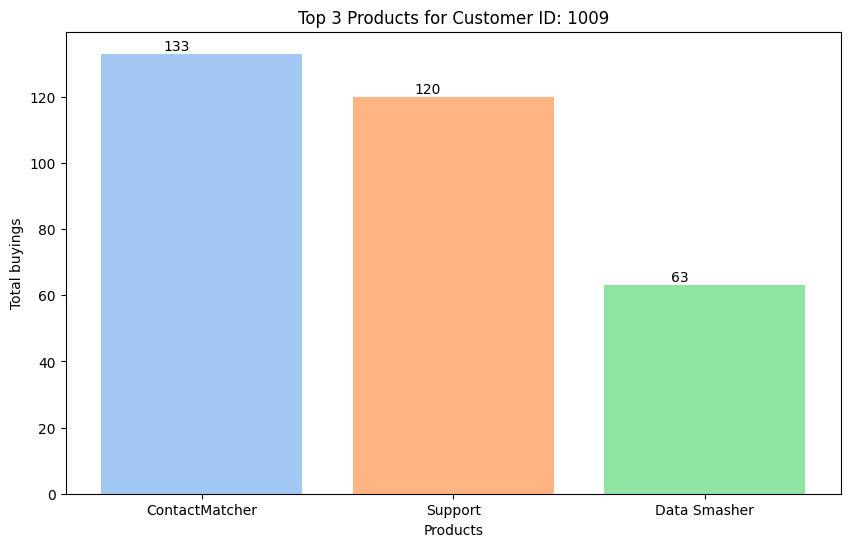

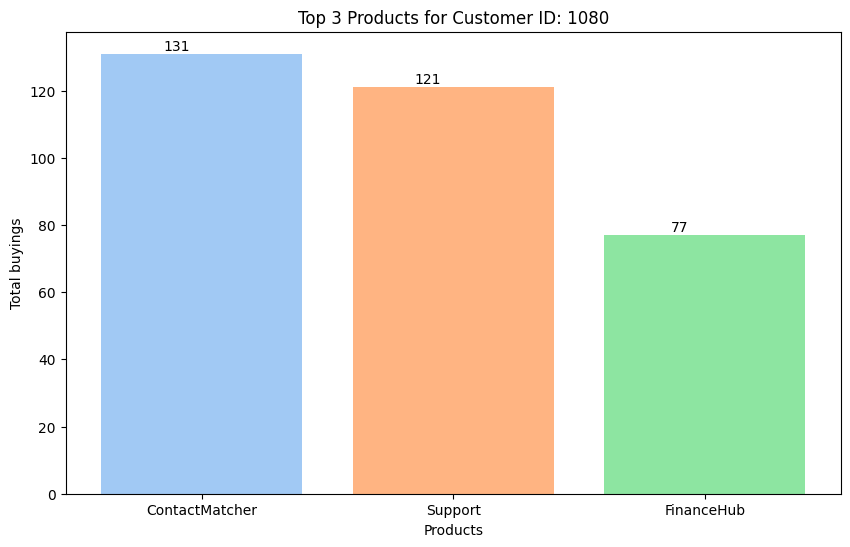

In [165]:
pastel_colors = sns.color_palette("pastel", n_colors=3)


for customer_id in top3_customers['Customer ID']:
    customer_data = df[df['Customer ID'] == customer_id]
    
    top_products = customer_data.groupby('Product')['Quantity'].sum().nlargest(3).reset_index()
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(top_products['Product'], top_products['Quantity'], color=pastel_colors)
    
    for bar, value in zip(bars, top_products['Quantity']):
        plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.2, str(value), ha='center', va='bottom', color='black')

    plt.xlabel('Products')
    plt.ylabel('Total buyings')
    plt.title(f"Top 3 Products for Customer ID: {customer_id}")
    
    plt.show()

> *Visualisasi:*
  - Diagram batang menampilkan produk yang paling sering dibeli oleh 3 pelanggan loyal tersebut.

In [166]:
loyalty.head(3)

,Customer ID,Sales,Country,Segment,Industry
28,1029,55719.2100,United States,SMB,Healthcare
8,1009,43893.0424,United States,SMB,Manufacturing
77,1080,42904.1670,United States,SMB,Finance


- **Output Insights:**

1. **Produk Kunci untuk Pelanggan Loyal:**
   - `ContactMatcher` konsisten populer di kalangan pelanggan loyal, menunjukkan pentingnya fitur ini dan potensi untuk terus dikembangkan.
   - Produk-produk dukungan pelanggan seperti `Support` dan `Data Smasher` juga sangat relevan, menandakan pentingnya solusi support yang andal.

2. **Karakteristik Umum Pelanggan Loyal:**
   - **Lokasi:** Ketiga pelanggan berada di Amerika Serikat.
   - **Segmen:** Termasuk dalam segmen SMB (Usaha Kecil dan Menengah).
   - **Industri:** Berasal dari industri yang beragam—Kesehatan, Manufaktur, dan Keuangan.

# **Analisis Laba**

## **1. Mendeteksi Tren Laba Produk**

---

**Tujuan:**

Menelusuri dinamika profitabilitas setiap produk dan mengidentifikasi peluang serta area yang perlu perbaikan dalam lini produk.

In [167]:
product_profit = df.groupby('Product')['Profit'].sum()
product_profit = product_profit.sort_values(ascending=False)


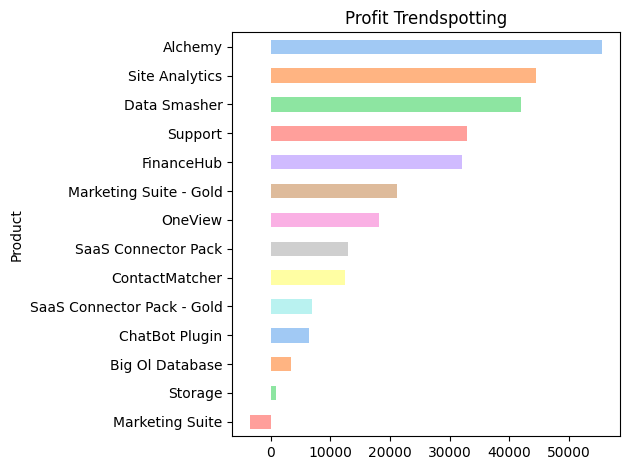

In [168]:
# Urutkan dari yang paling tinggi ke rendah
product_profit = product_profit.sort_values(ascending=False)

# Plot horizontal bar
product_profit.plot(kind='barh',
                    color=colors[:len(product_profit)],
                    title='Profit Trendspotting')

plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

> *Tren Profit:*
  - Menampilkan kontribusi relatif dari masing-masing produk terhadap total laba.

In [169]:
product_profit_top = df.groupby('Product')['Profit'].sum().nlargest(3)

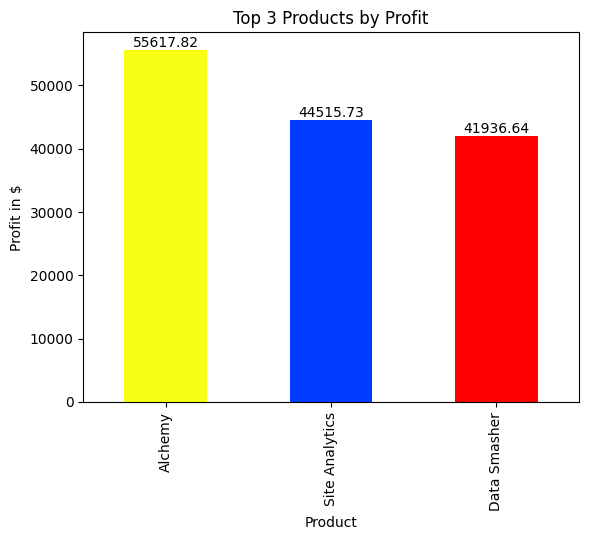

In [170]:
neon_colors = ["#F7FF14", "#003CFF", "#FF0000"]

ax_top = product_profit_top.plot(kind='bar', title='Top 3 Products by Profit', color=neon_colors)

for i, v in enumerate(product_profit_top):
    ax_top.text(i, v + 10, f'{v:.2f}', color='black', ha='center', va='bottom')
plt.ylabel('Profit in $')
plt.show()

> *Analisis Produk Paling Menguntungkan:*
  - Menampilkan nilai laba dari 3 produk teratas.

In [171]:
product_profit_bottom = df.groupby('Product')['Profit'].sum().nsmallest(3)

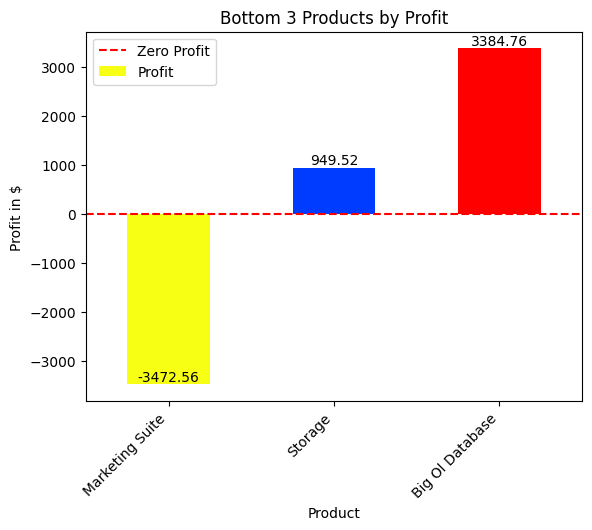

In [172]:
ax_bottom = product_profit_bottom.plot(kind='bar', title='Bottom 3 Products by Profit', color=neon_colors)

ax_bottom.axhline(y=0, color='red', linestyle='--', label='Zero Profit')

for i, v in enumerate(product_profit_bottom):
    ax_bottom.text(i, v + 10, f'{v:.2f}', color='black', ha='center', va='bottom')

plt.xticks(range(len(product_profit_bottom.index)), product_profit_bottom.index, rotation=45, ha='right')

plt.title('Bottom 3 Products by Profit')
plt.xlabel('Product')
plt.ylabel('Profit in $')

ax_bottom.legend()

plt.show()

> *Analisis Produk Paling Tidak Menguntungkan:*
  - Menampilkan nilai laba dari 3 produk terbawah.

- **Output Insights**

**Insights from Top and Bottom 3 Products by Profit:**

1. **Top 3 Produk Paling Menguntungkan : `Alchemy`, `Site Analytics`, dan `Data Smasher`**
   - memiliki laba yang tinggi, menandakan produk ini diterima baik oleh pasar.
   - Tim pengembangan produk disarankan mengalokasikan sumber daya lebih untuk peningkatan fitur dan promosi produk-produk ini.

2. **Bottom 3 Produk Kurang Menguntungkan: `Big Ol Database`, `Storage`, dan `Marketing Suite`**
   - menunjukkan laba rendah, yang bisa menandakan performa pasar yang buruk.
   - Evaluasi lebih lanjut diperlukan terhadap produk ini untuk mengidentifikasi kelemahan atau strategi baru guna meningkatkan profitabilitasnya.

# Analisis Penjualan Geografis

## **Meningkatkan Produk untuk Sukses Global**

---

**Tujuan:**

Mendukung pengambilan keputusan berbasis data untuk menyempurnakan dan memperluas penawaran produk, agar lebih sesuai dengan kebutuhan dan preferensi pasar internasional yang beragam.

In [173]:
ts_bc = df.groupby('Country')['Sales'].sum().reset_index()
country = ts_bc.sort_values(by='Sales')

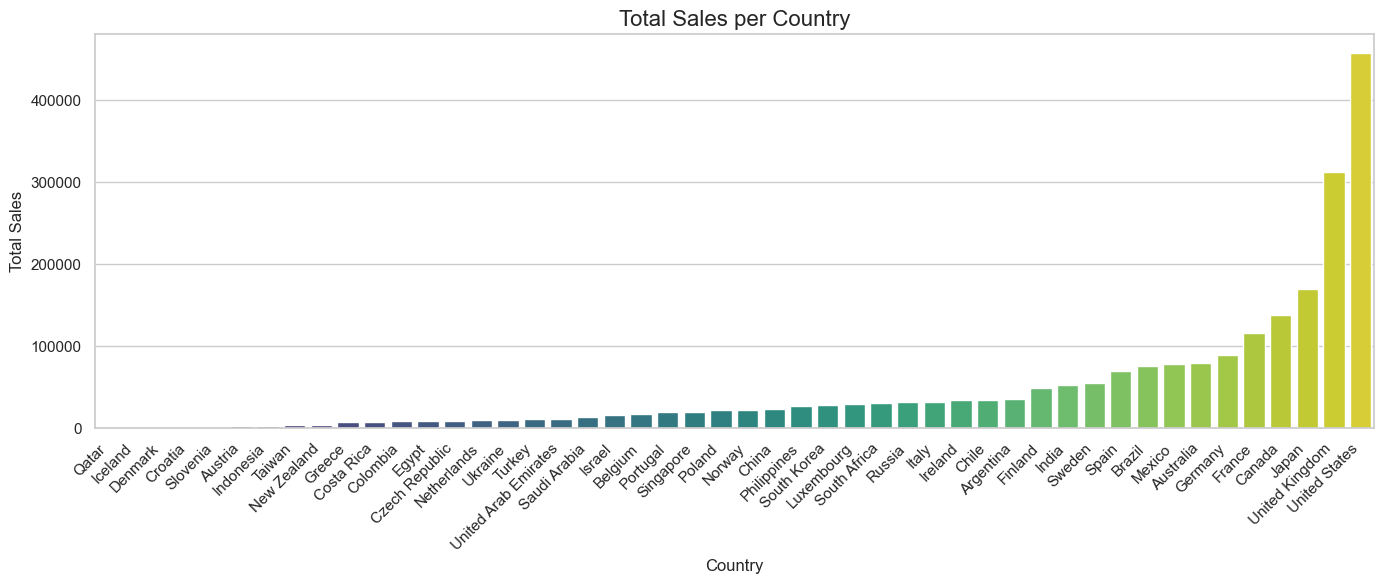

In [174]:
# Set style
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")

# Barplot vertikal
sns.barplot(
    x='Country',
    y='Sales',
    data=country,
    palette='viridis'
)

# Tambahkan judul dan label
plt.title('Total Sales per Country', fontsize=16)
plt.xlabel('Country')
plt.ylabel('Total Sales')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [175]:
bot3_countries = ts_bc.sort_values(by='Sales').head(3)
top3_countries = ts_bc.sort_values(by='Sales').tail(3)

In [176]:
top3_countries

,Country,Sales
24,Japan,170188.0458
46,United Kingdom,313169.8810
47,United States,457687.6315


In [177]:
bot3_countries

,Country,Sales
33,Qatar,919.910
18,Iceland,1209.824
12,Denmark,1270.530


> *Negara Teratas dan Terbawah:*
  - Mengidentifikasi 3 negara dengan penjualan tertinggi dan terendah.

In [178]:
def get_top_and_bottom_products(data, countries, top_n=3, bottom_n=3):
    products_list_top = []
    products_list_bottom = []
    for country in countries:
        top_products = data[data['Country'] == country].nlargest(top_n, 'Sales')
        bottom_products = data[data['Country'] == country].nsmallest(bottom_n, 'Sales')
        products_list_top.append(top_products)
        products_list_bottom.append(bottom_products)

    return products_list_top, products_list_bottom

In [179]:
top3_countries_data = df[df['Country'].isin(top3_countries['Country'])]
bottom3_countries_data = df[df['Country'].isin(bot3_countries['Country'])]

In [180]:
product_sales_top3 = top3_countries_data.groupby(['Country', 'Product'])['Sales'].sum().reset_index()
product_sales_bottom3 = bottom3_countries_data.groupby(['Country', 'Product'])['Sales'].sum().reset_index()

In [181]:
# Get top and bottom products for each set of countries
top_products_list, bottom_products_list = get_top_and_bottom_products(product_sales_top3, top3_countries['Country'])

In [182]:
print("\nTop 3 Products in Top 3 Countries:")
for products_df in top_products_list:
    country_name = products_df['Country'].iloc[0]
    print(f"\nIn {country_name}:")
    print(products_df[['Product', 'Sales']])


Top 3 Products in Top 3 Countries:

In Japan:
           Product      Sales
11  Site Analytics  28589.568
5       FinanceHub  27156.048
3   ContactMatcher  24803.337

In United Kingdom:
           Product      Sales
19      FinanceHub  47930.577
25  Site Analytics  47502.620
17  ContactMatcher  46396.570

In United States:
           Product      Sales
31  ContactMatcher  73903.400
39  Site Analytics  67964.536
33      FinanceHub  65978.508


In [183]:
print("\nBottom 3 Products in Top 3 Countries:")
for products_df in bottom_products_list:
    country_name = products_df['Country'].iloc[0]
    print(f"\nIn {country_name}:")
    print(products_df[['Product', 'Sales']])


Bottom 3 Products in Top 3 Countries:

In Japan:
           Product     Sales
12         Storage   332.464
2   ChatBot Plugin  2369.528
8          OneView  2407.814

In United Kingdom:
                       Product    Sales
26                     Storage   286.51
24  SaaS Connector Pack - Gold  1776.83
16              ChatBot Plugin  2983.60

In United States:
                       Product    Sales
40                     Storage   479.53
38  SaaS Connector Pack - Gold  3237.34
30              ChatBot Plugin  5495.66


In [184]:
# Get top and bottom products for Bottom countries
top_products_list, bottom_products_list = get_top_and_bottom_products(product_sales_bottom3, bot3_countries['Country'])

In [185]:
print("\nTop 3 Products in Bottom 3 Countries:")
for products_df in top_products_list:
    country_name = products_df['Country'].iloc[0]
    print(f"\nIn {country_name}:")
    print(products_df[['Product', 'Sales']])



Top 3 Products in Bottom 3 Countries:

In Qatar:
                   Product   Sales
10  Marketing Suite - Gold  704.76
8           ChatBot Plugin  181.84
9           ContactMatcher   25.90

In Iceland:
          Product    Sales
6  ContactMatcher  761.984
7         Support  447.840

In Denmark:
          Product   Sales
4  Site Analytics  437.85
1    Data Smasher  323.40
5         Support  259.74


In [186]:
print("\nBottom 3 Products in Bottom 3 Countries:")
for products_df in bottom_products_list:
    country_name = products_df['Country'].iloc[0]
    print(f"\nIn {country_name}:")
    print(products_df[['Product', 'Sales']])


Bottom 3 Products in Bottom 3 Countries:

In Qatar:
           Product   Sales
11         Storage    7.41
9   ContactMatcher   25.90
8   ChatBot Plugin  181.84

In Iceland:
          Product    Sales
7         Support  447.840
6  ContactMatcher  761.984

In Denmark:
               Product   Sales
0       ContactMatcher   38.10
2              OneView  101.96
3  SaaS Connector Pack  109.48


> *Produk Teratas dan Terbawah:*
  - Menampilkan 3 produk terlaris dan produk terendah untuk masing-masing negara tersebut.

# Analisis Penjualan Berdasarkan Industri

## **Pola Pemesanan Produk Antar Industri**

---

**Tujuan:**

Mengidentifikasi dan menganalisis produk yang paling sering dipesan di setiap industri, untuk memahami preferensi dan tren yang berlaku di berbagai sektor bisnis.

In [187]:
ipc= df.groupby(['Industry', 'Product']).size().reset_index(name='Order Count')

> *Pengelompokan Data:*
  - Data dikelompokkan berdasarkan industri dan produk, lalu dihitung jumlah pesanannya.

In [188]:
top3_op = ipc.groupby('Industry').apply(lambda x: x.nlargest(3, 'Order Count')).reset_index(drop=True)

In [189]:
print("Top 3 Most Ordered Products Across Industries:")
top3_op[['Industry', 'Product', 'Order Count']]

Top 3 Most Ordered Products Across Industries:


,Industry,Product,Order Count
0,Communications,ContactMatcher,112
1,Communications,Support,93
2,Communications,SaaS Connector Pack,69
3,Consumer Products,ContactMatcher,187
4,Consumer Products,Support,137
5,Consumer Products,FinanceHub,110
6,Energy,ContactMatcher,236
7,Energy,Support,214
8,Energy,FinanceHub,131
9,Finance,ContactMatcher,402


<Figure size 800x600 with 0 Axes>

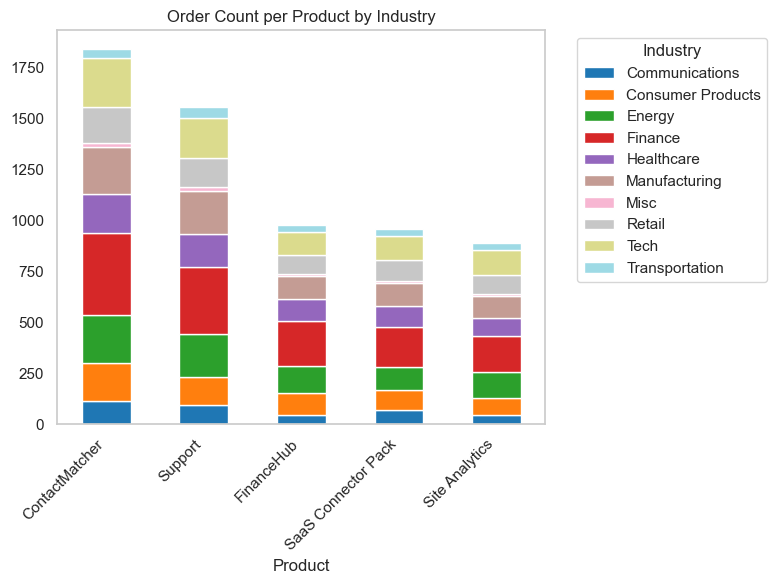

In [190]:
# Hitung total order per produk
top5_products = ipc.groupby('Product')['Order Count'].sum().nlargest(5).index

# Filter hanya 5 produk teratas
top5_df = ipc[ipc['Product'].isin(top5_products)]

# Set ukuran gambar
plt.figure(figsize=(8, 6))

# Buat pivot table agar bisa divisualisasikan sebagai stacked bar
pivot_df = top5_df.pivot(index='Product', columns='Industry', values='Order Count').fillna(0)

# Urutkan berdasarkan total jumlah
pivot_df = pivot_df.loc[pivot_df.sum(axis=1).sort_values(ascending=False).index]

# Plot stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20')

# Judul dan label
plt.title('Order Count per Product by Industry')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')

# Hilangkan grid jika diinginkan
plt.grid(False)

# Layout rapih
plt.tight_layout()
plt.show()

> *3 Produk Teratas:*
  - Menampilkan 3 produk yang paling banyak dipesan di berbagai industri.

- **Output Interpretation:**

1. **Produk Unggulan di Berbagai Industri:**
   - `ContactMatcher` menonjol sebagai produk paling sering dipesan di banyak industri.
   - `Support` dan `FinanceHub` juga menunjukkan permintaan tinggi, sering masuk dalam 3 besar di berbagai sektor.

2. **Preferensi Industri Spesifik:**
   - Industri Komunikasi cenderung memilih `SaaS Connector Pack`.
   - Ritel juga menunjukkan minat pada `SaaS Connector Pack`.
   - Industri Keuangan menunjukkan permintaan tinggi untuk `ContactMatcher`, `Support`, dan `FinanceHub`.

# Analisis Korelasi

In [191]:
print("\nCorrelation Analysis:")
for col1, col2 in [('Sales', 'Discount'), ('Sales', 'Profit'), ('Discount', 'Profit')]:
    corr, _ = spearmanr(df[col1], df[col2])
    print(f"{col1} & {col2}: {corr:.2f}")


Correlation Analysis:
Sales & Discount: -0.06
Sales & Profit: 0.52
Discount & Profit: -0.54


- **Analisis Korelasi:**
  - Menganalisis korelasi antara penjualan, diskon, dan laba untuk negara dengan penjualan tertinggi dan terendah.
  - Menggunakan metode korelasi *Spearman*.
  - Menyajikan koefisien korelasi antara:
    - Penjualan vs Diskon
    - Penjualan vs Laba
    - Diskon vs Laba

- **Interpretasi:**

  - Korelasi antara **Penjualan dan Diskon** adalah -0.06 → menunjukkan hubungan negatif sangat lemah, diskon sedikit menurunkan penjualan, namun tidak signifikan.

  - Korelasi antara **Penjualan dan Laba** adalah 0.52 → hubungan positif cukup kuat; penjualan tinggi cenderung menghasilkan laba tinggi.

  - Korelasi antara **Diskon dan Laba** adalah -0.54 → hubungan negatif cukup kuat; semakin besar diskon, laba cenderung menurun.

Analisis ini menunjukkan bahwa strategi diskon memiliki dampak signifikan terhadap profitabilitas, dan penting untuk dipertimbangkan dalam kebijakan harga dan pemasaran.

In [192]:
data = {'Product': [p.get_text() for p in ax.get_xticklabels()],
        'Sales': [p.get_height() for p in ax.patches]}

sales_df = pd.DataFrame(data)

sales_df


,Product,Sales
0,Alchemy,1099.98000
1,Big Ol Database,599.98500
2,Marketing Suite,306.82025
3,Site Analytics,209.97000
4,FinanceHub,180.98000
5,Marketing Suite - Gold,113.92800
6,Data Smasher,100.00000
7,OneView,82.69000
8,SaaS Connector Pack,41.96000
9,SaaS Connector Pack - Gold,29.04600


In [193]:

data = {'Product': product_profit.index,
        'Profit': product_profit.values}

profit_df = pd.DataFrame(data)

profit_df


,Product,Profit
0,Alchemy,55617.8249
1,Site Analytics,44515.7306
2,Data Smasher,41936.6357
3,Support,32864.4698
4,FinanceHub,32136.4203
5,Marketing Suite - Gold,21278.8264
6,OneView,18138.0054
7,SaaS Connector Pack,13059.1436
8,ContactMatcher,12496.2822
9,SaaS Connector Pack - Gold,6964.1767


Dari data yang tersedia, beberapa permasalahan penting teridentifikasi:

1. **Nilai Laba Negatif:**  
   Produk seperti "Marketing Suite" dan "Marketing Suite - Gold" menunjukkan nilai laba negatif. Ini menandakan kerugian dari penjualan produk tersebut. Perlu evaluasi strategi penjualan dan harga.

2. **Korelasi Mengkhawatirkan:**  
   Korelasi negatif yang kuat antara diskon dan laba (-0.54) mengindikasikan bahwa diskon besar bisa berdampak buruk pada profitabilitas.

3. **Korelasi Lemah antara Penjualan dan Diskon:**  
   Nilainya hanya -0.06, artinya pemberian diskon tidak terlalu berpengaruh dalam meningkatkan penjualan.

4. **Ketidaksesuaian antara Penjualan dan Laba:**  
   Beberapa produk seperti "Alchemy" dan "Big Ol Database" meskipun memiliki penjualan tinggi, ternyata labanya relatif rendah. Bisa jadi karena biaya produksi tinggi atau efisiensi operasional yang buruk.

In [196]:
# Export to XLXS
df.to_excel('SaaS-Sales_cleaned.xlsx', index=False)

# Kesimpulan

## Pola Penjualan
- Produk seperti **Alchemy**, **Big Ol Database**, dan **Marketing Suite** memiliki performa penjualan tinggi.
- Puncak musiman terjadi pada bulan Desember (2020–2022), menunjukkan pengaruh belanja akhir tahun.
- Secara umum, tren penjualan mengalami kenaikan meski ada fluktuasi.

## Kinerja Produk
- Produk unggulan: **Alchemy**, **Big Ol Database**, **Marketing Suite**.
- Produk yang perlu ditingkatkan: **SaaS Connector Pack - Gold**, **ChatBot Plugin**, **Storage**.
- Beberapa produk seperti **Marketing Suite** mengalami kerugian meskipun penjualan tinggi.

## Penjualan Regional
- Negara kecil seperti **Qatar**, **Islandia**, dan **Denmark** tetap berkontribusi pada penjualan global.
- Preferensi produk bervariasi:
  - **ContactMatcher** → Amerika Serikat
  - **FinanceHub** → Inggris
  - **Site Analytics** → Jepang

## Permintaan Industri
- Industri keuangan memiliki permintaan tinggi, terutama terhadap **ContactMatcher**, **Support**, dan **FinanceHub**.

## Korelasi
- Terdapat hubungan positif sedang antara penjualan dan laba.
- Korelasi negatif antara diskon dan laba patut diperhatikan.

# Rekomendasi


## Penyesuaian Strategi Harga
- Evaluasi ulang strategi harga untuk produk dengan margin laba negatif seperti **Marketing Suite**.

## Review Strategi Diskon
- Karena diskon berdampak buruk pada laba, perlu dikaji ulang efektivitas strategi diskon saat ini.

## Efisiensi Operasional
- Tingkatkan efisiensi operasional pada produk dengan penjualan tinggi tapi laba rendah, seperti **Alchemy** dan **Big Ol Database**.

## Fokus Pengembangan & Pemasaran
- Alokasikan lebih banyak sumber daya untuk pengembangan dan promosi produk yang kurang perform seperti:
  - **SaaS Connector Pack - Gold**
  - **ChatBot Plugin**
  - **Storage**